In [9]:
! pip install scikit-plot

In [10]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve



from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold


from sklearn import tree 
import pydotplus 
from IPython.display import Image

In [11]:
df=pd.read_csv("prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [12]:
df_copy=df.copy()

cat_var=["vocal_channel","statement","repetition","emotional_intensity"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,0,0,1,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,0,0,0,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,1,0,1,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,0,1,0,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,1,0,1,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [13]:
# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,F,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,F,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,F,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,F,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,F,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [14]:
le=preprocessing.LabelEncoder()
df_copy["sex"]=le.fit_transform(df_copy["sex"])
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [15]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [16]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp))
    #print(roc_auc_score(y_test, y_tmp[:,1]))

In [17]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [18]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

In [19]:
#Print Decision Tree

def print_DecisionTree(dt):
    plt.figure(figsize=(20, 4), dpi=300)
    plot_tree(dt, feature_names=df_copy.columns, filled=True)
    plt.show() 

In [20]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = StratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [21]:
col=[x for x in df_copy.columns if x!="sex"]
X=df_copy[col].values
y = np.array(df_copy["sex"])


#holdout -> sex bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

TECNICA SHPP

In [25]:
#Esperimento 1: f1_macro

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["gini", "entropy"] 
                }

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=check_params,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0), 
    refit=True, # -> ci dice che alla fine il modello verrà riallenato con la migliore combinazione di iperparametri
    scoring="f1_macro"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_macro')

In [26]:
clf = grid.best_estimator_
clf

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [27]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9141259729688533


In [28]:
clf.score(X_test, y_test)

0.9118457300275482

In [29]:
learner = DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=20, min_samples_split=15)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       364
           1       0.91      0.90      0.90       362

    accuracy                           0.90       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.90      0.90      0.90       726



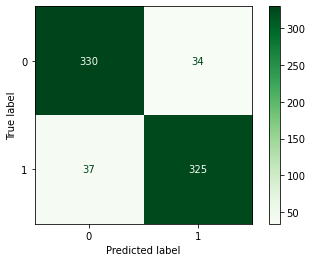

In [30]:
print_confMatrix(y_test,predictions)

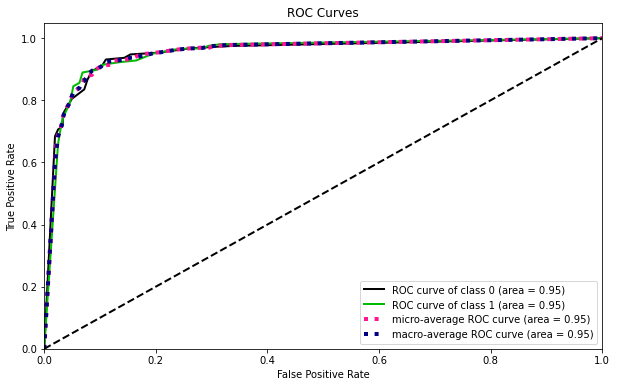

In [31]:
print_rocCurve(learner,X_test,y_test)

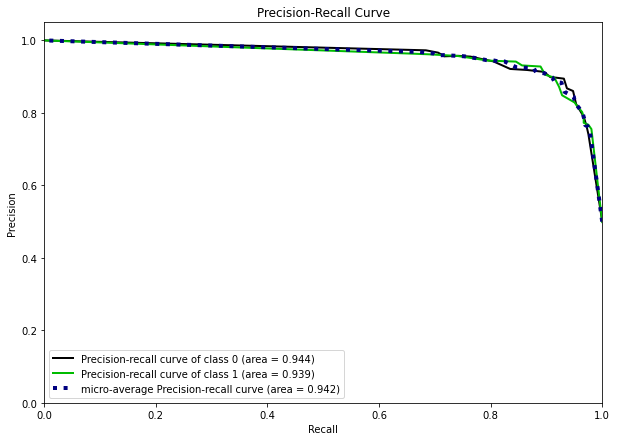

In [32]:
print_precrecCurve(learner,X_test,y_test)

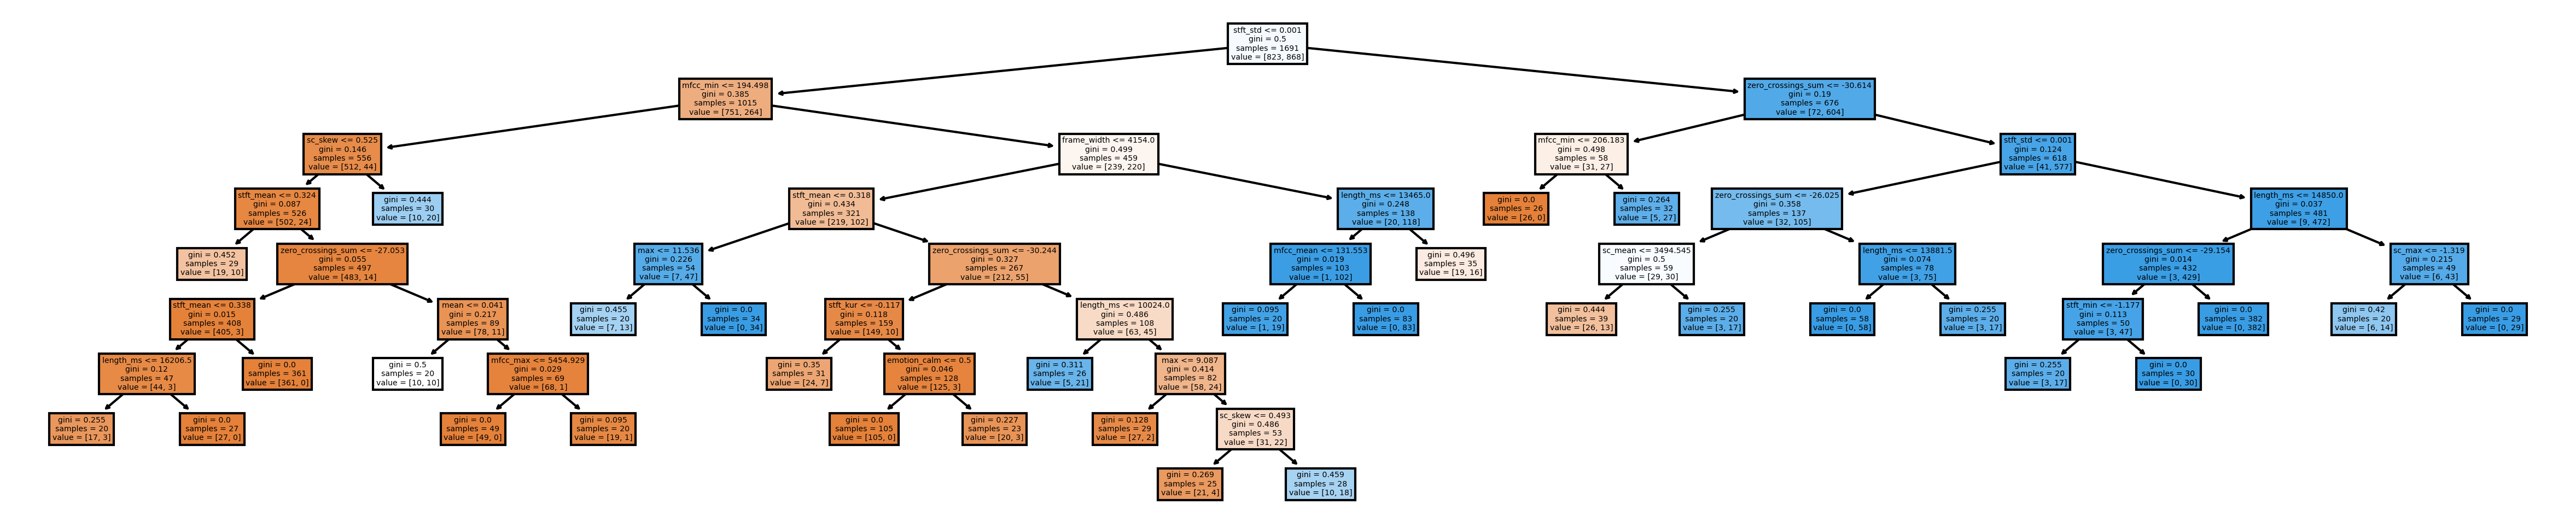

In [33]:
#Print Decision Tree
print_DecisionTree(learner)

In [34]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(col)}
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'stft_min': 0.36878691743019704,
 'mfcc_mean': 0.13071046189761515,
 'mfcc_max': 0.09601955726886728,
 'zero_crossings_sum': 0.08248161764565527,
 'stft_mean': 0.07020689719724797,
 'length_ms': 0.05552456574130749,
 'stft_std': 0.04813517156957208,
 'std': 0.03412488011522646,
 'min': 0.016311274531857205,
 'sc_std': 0.0142444576716264,
 'sc_mean': 0.013014210656921932,
 'mean': 0.011451616936771004,
 'sc_max': 0.010984405825828176,
 'statement': 0.01059242465125326,
 'sc_min': 0.00911699253650096,
 'kur': 0.007105934444346327,
 'repetition': 0.004092252653489726,
 'emotion_surprised': 0.0039009860498267724,
 'emotion_disgust': 0.003628490897025872,
 'stft_kur': 0.002687578008581259,
 'sc_kur': 0.0025955817284673915,
 'sc_skew': 0.0021418622709074935,
 'max': 0.0021418622709074935,
 'vocal_channel': 0.0,
 'emotional_intensity': 0.0,
 'frame_width': 0.0,
 'mfcc_std': 0.0,
 'mfcc_min': 0.0,
 'stft_skew': 0.0,
 'skew': 0.0,
 'emotion_angry': 0.0,
 'emotion_calm': 0.0,
 'emotion_fearful'

vocal_channel 0.0
emotional_intensity 0.0
statement 0.0
repetition 0.0
frame_width 0.0
mfcc_std 0.0
mfcc_min 0.0
sc_mean 0.0
sc_min 0.0
sc_max 0.0
sc_kur 0.0
stft_kur 0.0
mean 0.0
min 0.0
max 0.0
emotion_angry 0.0
emotion_calm 0.0
emotion_fearful 0.0
emotion_happy 0.0
emotion_neutral 0.0
emotion_sad 0.0
emotion_surprised 0.0
emotion_disgust 0.0009494161339117246
skew 0.0009897112557856857
sc_skew 0.0032700892612831166
stft_skew 0.0038215024435813206
sc_std 0.010438211269621177
std 0.0108104336883777
kur 0.011204604197270538
zero_crossings_sum 0.03995046715097227
stft_mean 0.0415897310797027
stft_std 0.0672676818105631
mfcc_mean 0.08196335208358126
length_ms 0.08241242663982008
mfcc_max 0.14929256378981262
stft_min 0.49603980919571683


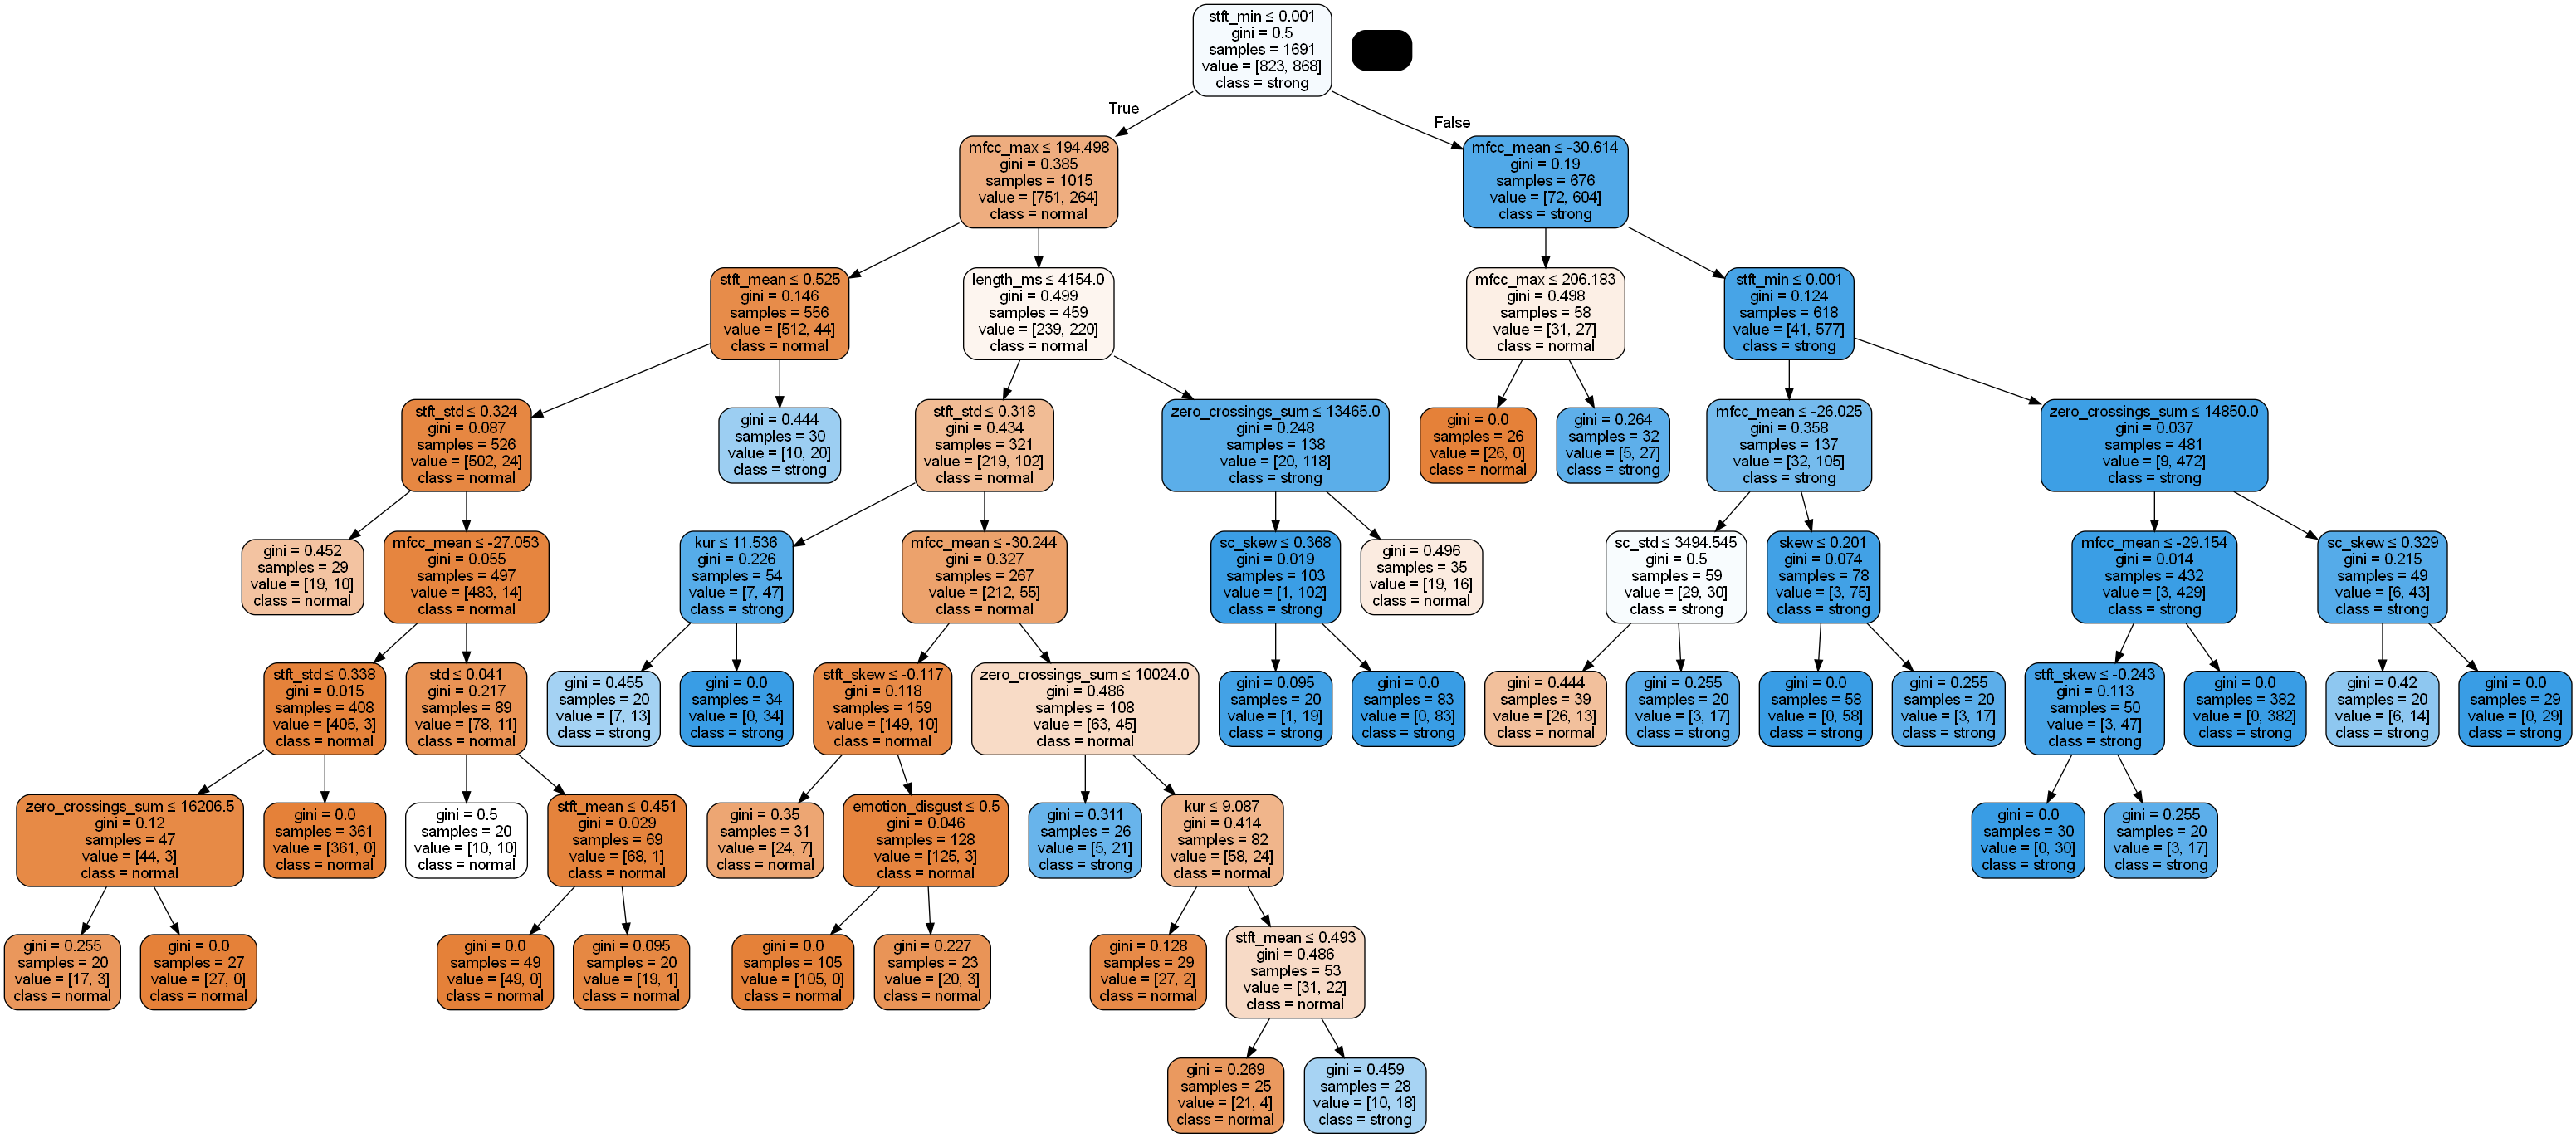

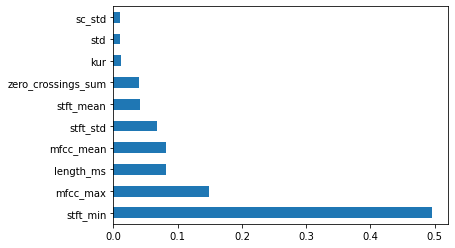

In [35]:
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 20, min_samples_split = 15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

zipped = zip(col, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for i, imp in zipped:
    print(i, imp)

feat_importances = pd.Series(clf.feature_importances_, index=col)
feat_importances.nlargest(10).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=col,
                                class_names=['strong' if x == 1 else 'normal' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=15)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [36]:
feature_importanti=[]
for i, imp in zipped:
    if imp>0.02:
        print(i, imp)
        feature_importanti.append(i)
print(feature_importanti)

zero_crossings_sum 0.03995046715097227
stft_mean 0.0415897310797027
stft_std 0.0672676818105631
mfcc_mean 0.08196335208358126
length_ms 0.08241242663982008
mfcc_max 0.14929256378981262
stft_min 0.49603980919571683
['zero_crossings_sum', 'stft_mean', 'stft_std', 'mfcc_mean', 'length_ms', 'mfcc_max', 'stft_min']


ULTIMO ESPERIMENTO --> 
PRENDO LE 10 FEATURES PIU IMPORTANTI OTTENUTE DALL'ESPERIMENTO PRECEDENTE E LE USO PER CLASSIFICARE SEX

In [40]:
X=df_copy[feature_importanti].values
y = np.array(df_copy["sex"])

#holdout -> sex bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [41]:
#Esperimento 1: f1_macro

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["gini", "entropy"] 
                }

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=check_params,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0), 
    refit=True, # -> ci dice che alla fine il modello verrà riallenato con la migliore combinazione di iperparametri
    scoring="f1_macro"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_macro')

In [42]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9159578811046893


In [43]:
learner = DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=20, min_samples_split=15)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       364
           1       0.92      0.90      0.91       362

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.91      0.91      0.91       726



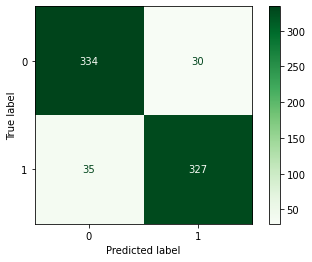

In [44]:
print_confMatrix(y_test,predictions)

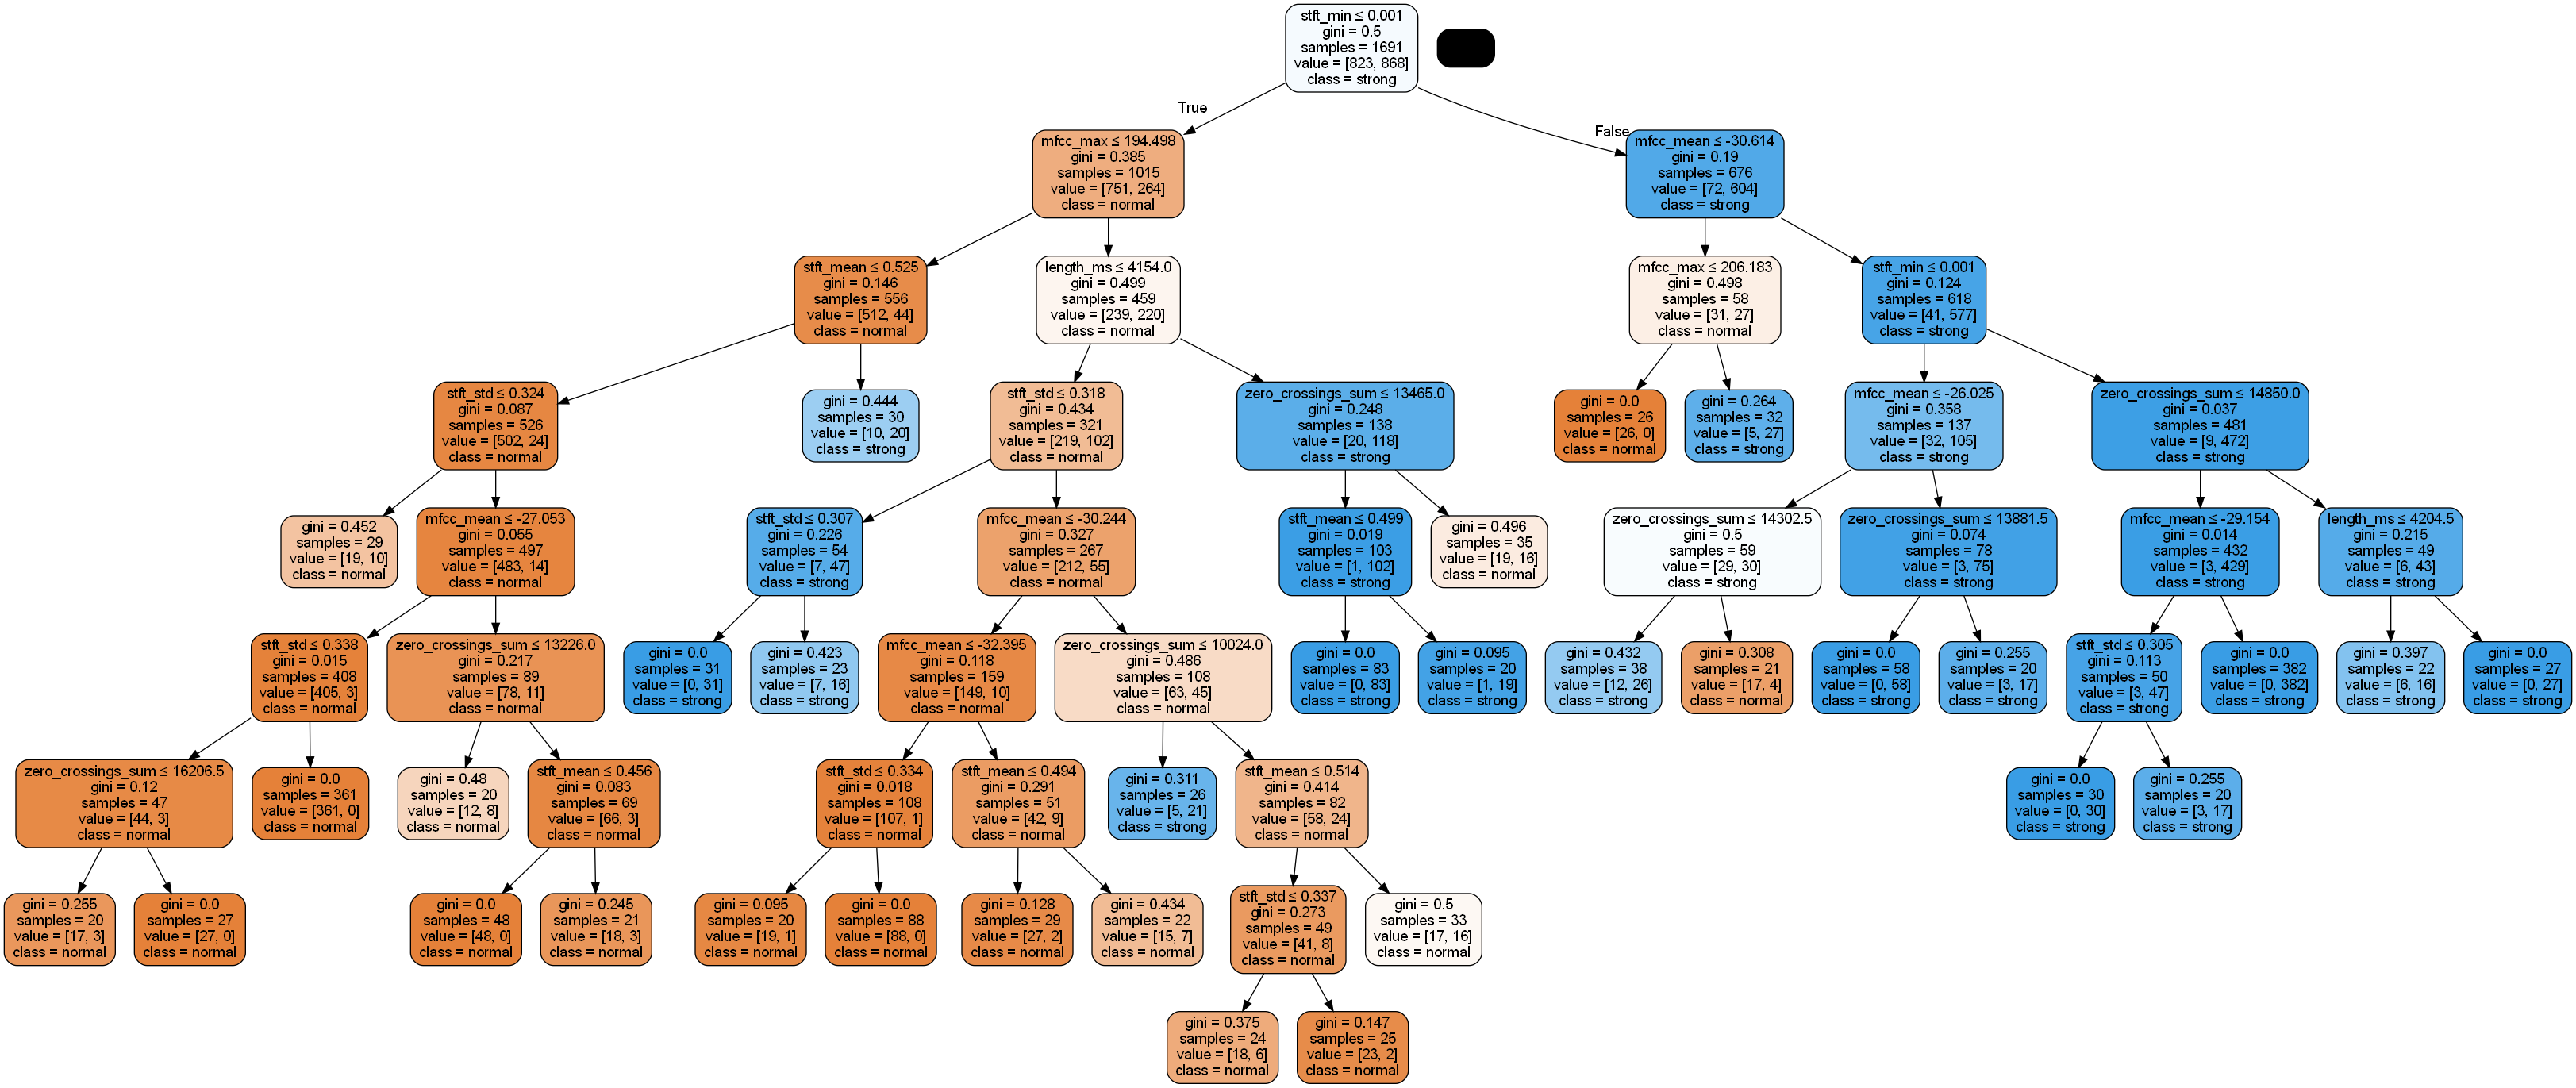

In [45]:
dot_data = tree.export_graphviz(learner, out_file=None,
                                feature_names=feature_importanti,
                                class_names=['strong' if x == 1 else 'normal' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=15)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())